<a href="https://colab.research.google.com/github/ShunsukeT15/hyousiki/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [41]:
%run prepare_images.py datasets/mydata

Copied images from datasets/mydata/stop
Copied images from datasets/mydata/no_entry
Copied images from datasets/mydata/warning
Copied images from datasets/mydata/ramen


<Figure size 432x288 with 0 Axes>

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.7.0
class number=4
['no_entry', 'ramen', 'stop', 'warning']


Found 219 images belonging to 4 classes.
Found 57 images belonging to 4 classes.
## Train Data Sample ##


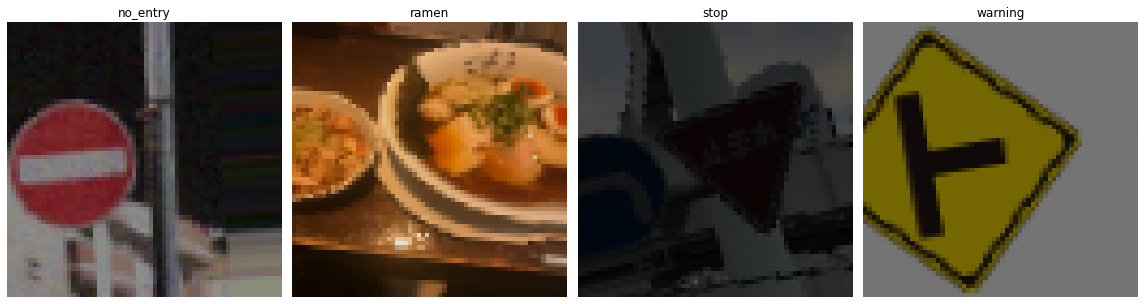

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 64, 64, 8)         224       
                                                                 
 activation_33 (Activation)  (None, 64, 64, 8)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 62, 62, 8)         584       
                                                                 
 activation_34 (Activation)  (None, 62, 62, 8)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 8)         584       
                                                                 
 activation_35 (Activation)  (None, 60, 60, 8)         0         
                                                                 
 conv2d_22 (Conv2D)          (None, 58, 58, 8)        

In [46]:
# 学習率
LEARNING_RATE = 0.0005
# エポック（世代数）
EPOCHS = 30
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 64

#train_data_gen = ImageDataGenerator(rescale=1./255)
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=15,width_shift_range=0.3,brightness_range=[0.3, 1.0])
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=60,channel_shift_range=5.,brightness_range=[0.3, 1.0],zoom_range=0.5,horizontal_flip=0.3,vertical_flip=0.3)
val_data_gen = ImageDataGenerator(rescale=1./255,rotation_range=15)
#val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[0.377 0.613 0.01  0.   ]
 [0.206 0.781 0.011 0.001]
 [0.175 0.815 0.009 0.001]
 [0.91  0.007 0.081 0.003]
 [0.98  0.    0.019 0.   ]
 [0.963 0.001 0.035 0.001]
 [0.983 0.001 0.016 0.   ]
 [0.922 0.006 0.071 0.001]
 [0.961 0.008 0.03  0.001]
 [0.961 0.007 0.03  0.001]
 [0.674 0.005 0.316 0.005]
 [0.615 0.007 0.368 0.01 ]
 [0.789 0.001 0.135 0.076]
 [0.707 0.    0.28  0.013]
 [0.735 0.012 0.253 0.001]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.998 0.    0.002]
 [0.007 0.71  0.054 0.23 ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.021 0.865 0.09  0.024]
 [0.001 0.925 0.002 0.073]
 [0.305 0.    0.667 0.027]
 [0.082 0.001 0.91  0.007]
 [0.041 0.001 0.954 0.004]
 [0.351 0.    0.629 0.019]
 [0.069 0.    0.924 0.006]
 [0.034 0.    0.964 0.002]
 [0.066 0.    0.932 0.002]
 [0.058 0.    0.932 0.01 ]
 [0.494 0.  

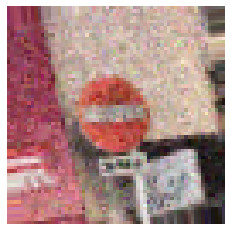

#1 Expected:no_entry -> Predicted:ramen
File: no_entry/S__53895212-smooth.jpg
Each Prediction Value: [0.206 0.781 0.011 0.001]
**** INCORRECT ****


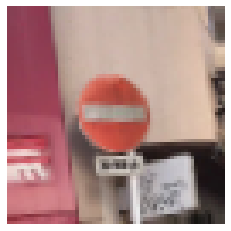

#2 Expected:no_entry -> Predicted:ramen
File: no_entry/S__53895212.jpg
Each Prediction Value: [0.175 0.815 0.009 0.001]
**** INCORRECT ****


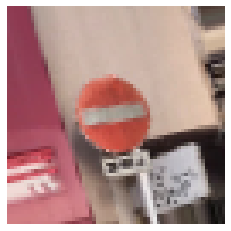

#3 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895213.jpg
Each Prediction Value: [0.91  0.007 0.081 0.003]
* Correct *
#4 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895217-noise.jpg
Each Prediction Value: [0.98  0.    0.019 0.   ]
* Correct *
#5 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895218-noise+Snoise.jpg
Each Prediction Value: [0.963 0.001 0.035 0.001]
* Correct *
#6 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895218.jpg
Each Prediction Value: [0.983 0.001 0.016 0.   ]
* Correct *
#7 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895219-smooth.jpg
Each Prediction Value: [0.922 0.006 0.071 0.001]
* Correct *
#8 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895221-noise25.jpg
Each Prediction Value: [0.961 0.008 0.03  0.001]
* Correct *
#9 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895221-smooth.jpg
Each Prediction Value: [0.961 0.007 0.03  0.001]
* Correct *
#10 Expected:n

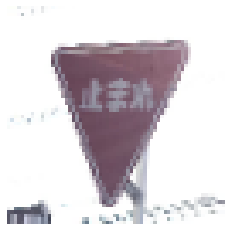

#37 Expected:stop -> Predicted:stop
File: stop/S__54132766.jpg
Each Prediction Value: [0.116 0.    0.845 0.038]
* Correct *
#38 Expected:stop -> Predicted:stop
File: stop/S__54132773.jpg
Each Prediction Value: [0.471 0.    0.523 0.006]
* Correct *
#39 Expected:stop -> Predicted:stop
File: stop/S__54132779.jpg
Each Prediction Value: [0.121 0.    0.877 0.002]
* Correct *
#40 Expected:stop -> Predicted:stop
File: stop/S__54132780.jpg
Each Prediction Value: [0.022 0.    0.975 0.003]
* Correct *
#41 Expected:stop -> Predicted:stop
File: stop/S__54132787.jpg
Each Prediction Value: [0.108 0.    0.888 0.003]
* Correct *
#42 Expected:stop -> Predicted:stop
File: stop/stop_val1.jpg
Each Prediction Value: [0.24  0.    0.729 0.03 ]
* Correct *
#43 Expected:stop -> Predicted:stop
File: stop/止まれ1.jpg
Each Prediction Value: [0.003 0.    0.997 0.   ]
* Correct *
#44 Expected:stop -> Predicted:no_entry
File: stop/止まれ18.jpg
Each Prediction Value: [0.873 0.008 0.117 0.002]
**** INCORRECT ****


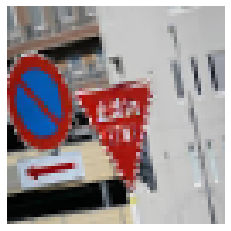

#45 Expected:stop -> Predicted:no_entry
File: stop/止まれ19.jpg
Each Prediction Value: [0.813 0.    0.181 0.006]
**** INCORRECT ****


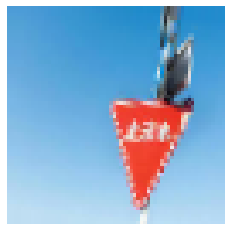

#46 Expected:stop -> Predicted:stop
File: stop/止まれ3.jpg
Each Prediction Value: [0.049 0.    0.95  0.001]
* Correct *
#47 Expected:warning -> Predicted:warning
File: warning/S__54026303.jpg
Each Prediction Value: [0.    0.    0.001 0.998]
* Correct *
#48 Expected:warning -> Predicted:warning
File: warning/S__54026304.jpg
Each Prediction Value: [0.001 0.    0.087 0.912]
* Correct *
#49 Expected:warning -> Predicted:warning
File: warning/S__54026309.jpg
Each Prediction Value: [0. 0. 0. 1.]
* Correct *
#50 Expected:warning -> Predicted:warning
File: warning/S__54026310.jpg
Each Prediction Value: [0. 0. 0. 1.]
* Correct *
#51 Expected:warning -> Predicted:warning
File: warning/keikai13.png
Each Prediction Value: [0. 0. 0. 1.]
* Correct *
#52 Expected:warning -> Predicted:warning
File: warning/keikai17.png
Each Prediction Value: [0. 0. 0. 1.]
* Correct *
#53 Expected:warning -> Predicted:warning
File: warning/keikai20.png
Each Prediction Value: [0. 0. 0. 1.]
* Correct *
#54 Expected:warning 

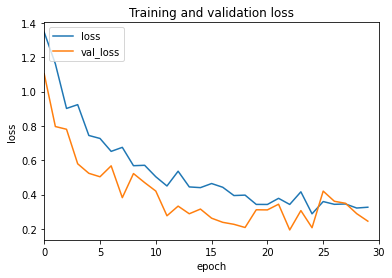

Accuracy


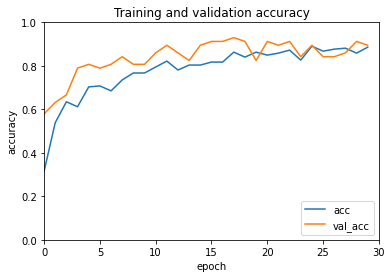

Confusion Matrix


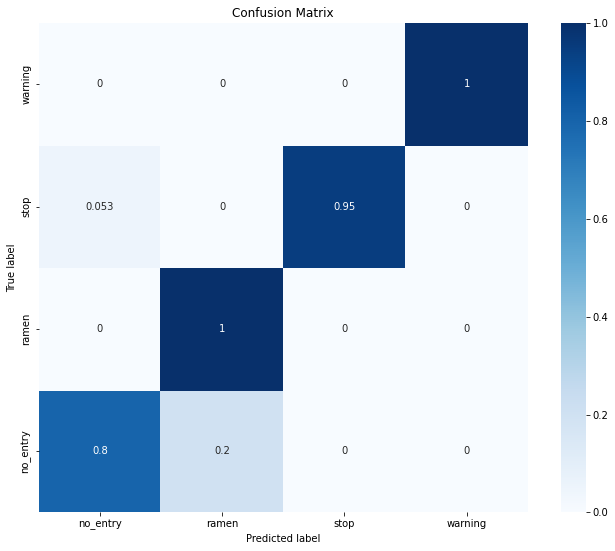

In [47]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d_11


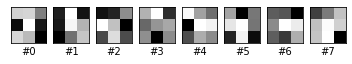

Visualize filter: conv2d_12


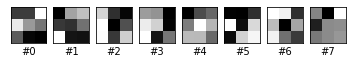

In [34]:
visualize.vis_filter(model, 'conv2d_11')
visualize.vis_filter(model, 'conv2d_12')

In [48]:
!cat incorrect.txt

target_datasets/val/no_entry/S__53895212-noise25.jpg
target_datasets/val/no_entry/S__53895212-smooth.jpg
target_datasets/val/no_entry/S__53895212.jpg
target_datasets/val/stop/S__54132763.jpg
target_datasets/val/stop/止まれ18.jpg
target_datasets/val/stop/止まれ19.jpg


In [50]:
!cat correct.txt

target_datasets/val/no_entry/S__53895213.jpg
target_datasets/val/no_entry/S__53895217-noise.jpg
target_datasets/val/no_entry/S__53895218-noise+Snoise.jpg
target_datasets/val/no_entry/S__53895218.jpg
target_datasets/val/no_entry/S__53895219-smooth.jpg
target_datasets/val/no_entry/S__53895221-noise25.jpg
target_datasets/val/no_entry/S__53895221-smooth.jpg
target_datasets/val/no_entry/S__53895225-noise25.jpg
target_datasets/val/no_entry/S__53895225-smooth.jpg
target_datasets/val/no_entry/S__53919756.jpg
target_datasets/val/no_entry/S__53919759.jpg
target_datasets/val/no_entry/S__53919771.jpg
target_datasets/val/ramen/S__54157322.jpg
target_datasets/val/ramen/S__54157332.jpg
target_datasets/val/ramen/S__54157338.jpg
target_datasets/val/ramen/S__54157340.jpg
target_datasets/val/ramen/S__54157342.jpg
target_datasets/val/ramen/S__54157351.jpg
target_datasets/val/ramen/ramen14.jpg
target_datasets/val/ramen/ramen20.jpg
target_datasets/val/ramen/ramen26.jpg
target_datasets/val/ramen/ramen27.jpg


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 8)       224       
                                                                 
 activation_21 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 8)       584       
                                                                 
 activation_22 (Activation)  (None, 126, 126, 8)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 8)       584       
                                                                 
 activation_23 (Activation)  (None, 124, 124, 8)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 122, 122, 8)      

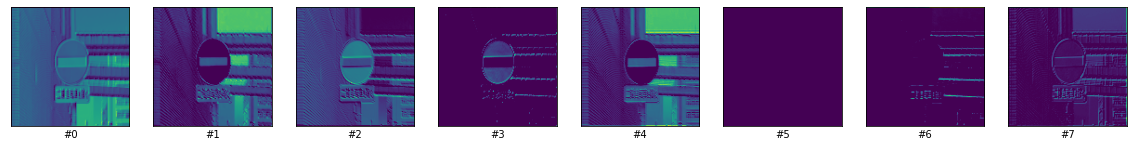

target_datasets/val/no_entry/S__53895213.jpg


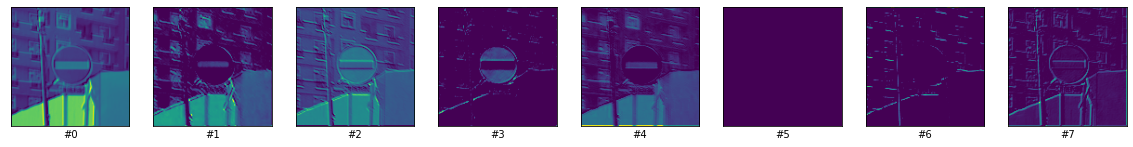

target_datasets/val/no_entry/S__53895214.jpg


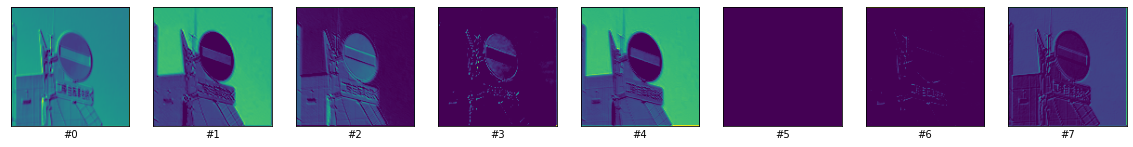

target_datasets/val/stop/S__54091795.jpg


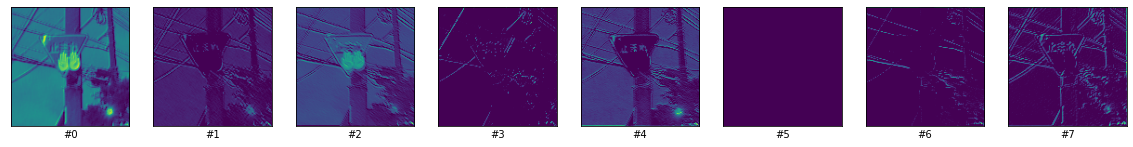

target_datasets/val/stop/S__54149123.jpg


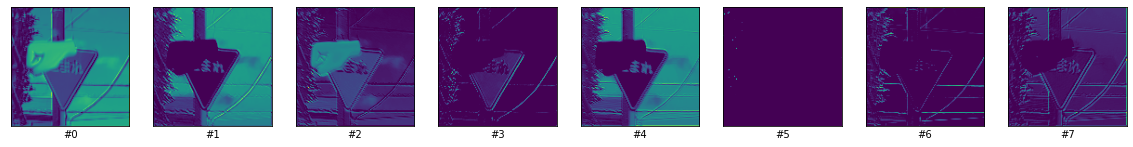

target_datasets/val/warning/keikai29.jpg


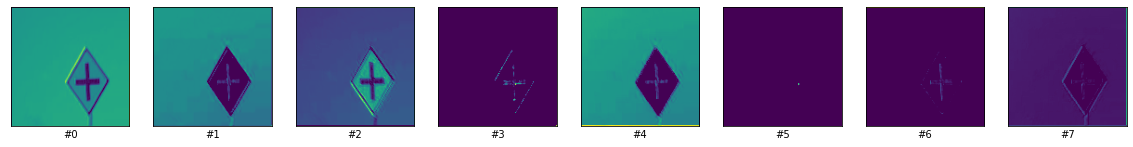

In [38]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_21', IMAGE_SIZE)